In [1]:
import numpy as np 
import matplotlib.pylab as plt
import numpy as np
from scipy.integrate import cumtrapz
from scipy.optimize import curve_fit

from matplotlib import rc
fontsize = 10
fontstyle = {
    "pdf.fonttype": 42, # type 3 pdf fonts
    "mathtext.default": 'regular', # italic math
    'mathtext.fontset': 'cm',
    'font.family' : 'STIXGeneral',
    "text.latex.preamble":
        r'\usepackage{upgreek}',
    "text.usetex": True, # latex-based math
    # sans-serif Helvetica font
    #"text.latex.preamble":
    #    r'\usepackage{helvet} \usepackage{sansmath} \sansmath',
    #"font.family": "sans-serif",
    # font sizes
    "axes.labelsize": fontsize,
    'axes.titlesize': fontsize,
    "font.size": fontsize,
    "legend.fontsize": fontsize,
    "xtick.labelsize": fontsize,
    'xtick.direction': "inout",
    'xtick.top': True,
    'xtick.major.size': 4,
    'xtick.major.width': 0.5,
    'xtick.minor.width': 0.5,
    "ytick.labelsize": fontsize,
    'ytick.direction': "inout",
    'ytick.right': True,
    'ytick.major.size': 4,
    'ytick.major.width': 0.5,
    'ytick.minor.width': 0.5,
    "axes.linewidth": 0.5,
}

plt.rcParams.update(fontstyle)

c = 3e8
eps0 = 8.85e-12
import sys
sys.path.append("../src")
from tweezer_force import Domain
from matplotlib import cm
from matplotlib.colors import Normalize


In [2]:
letters_lower = [r"$\mathrm{\bf{%s}}$" % lett for lett in "abcdefghijklmnopqrstuvwxyz"]
letters_round = [r"$\mathrm{\bf{(%s)}}$" % lett for lett in "abcdefghijklmnopqrstuvwxyz"] 
letters_upper = [r"$\bf{%s}$" % lett for lett in "abcdefghijklmnopqrstuvwxyz".upper()] 
letters_map = {"round": letters_round, "upper": letters_upper, "lower":letters_lower}  
def lettering(ax, x, y, num, color="k", mode="round", **kwargs):     
    letters = letters_map[mode]     
    ax.text(x, y, letters[num], weight="bold", transform=ax.transAxes,             
            horizontalalignment="center", verticalalignment="center", color=color, **kwargs)

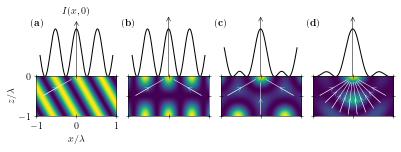

In [3]:





def draw_arrow(ax, angle, L=1, c="k", lw=3):
    x0 = -L*np.sin(angle)
    y0 = -L*np.cos(angle)
    
    x1 = -L/2*np.sin(angle)
    y1 = -L/2*np.cos(angle)
    
    x2 = -L/10*np.sin(angle)
    y2 = -L/10*np.cos(angle)
    ax.annotate('', xytext=(x0, y0), xy=(x1,y1), arrowprops=dict(arrowstyle='->', color=c, lw=lw/2))
    ax.annotate('', xytext=(x0, y0), xy=(x2,y2), arrowprops=dict(arrowstyle='-', color=c, lw=lw))

    

ang = np.pi/3
ths_list = [np.linspace(ang, -ang, N) for N in(1,2,3,10)]
lmbda = 1
k = 2*np.pi/lmbda
xs = np.linspace(-lmbda, lmbda, 1000)
zs = np.linspace(-lmbda, 0, 1000)
Xs, Zs = np.meshgrid(xs, zs)

fig = plt.figure(figsize=(5.5, 2.), constrained_layout=False)
outer_grid = fig.add_gridspec(1, 4, wspace=0.15, hspace=0)
for thsi, ths in enumerate(ths_list):    
    E1 = np.sum([np.cos(k*xs*np.sin(th)) for th in ths], axis=0)
    I1 = E1**2
    I1 /= np.max(I1)
    E2 = np.sum([np.cos(k*Xs*np.sin(th)+k*Zs*np.cos(th)) for th in ths], axis=0)
    I2 = E2**2
    I2 /= np.max(I2)



    # gridspec inside gridspec
    inner_grid = outer_grid[thsi].subgridspec(2, 1, hspace=-0.445, height_ratios=(1,2))
    axs = inner_grid.subplots()  # Create all subplots for the inner grid.
   
    axs[0].plot(xs, I1, c="k", lw=1)
    
    axs[1].imshow(I2, origin="lower", extent=[xs[0], xs[-1], zs[0], zs[-1]], interpolation=None, aspect=1)
    for th in ths:
        draw_arrow(axs[1], th, lw=0.5, c="w")

    
    
    lettering(axs[0], 0.0, 1.05, thsi)
    
    axs[0].set_axis_off()

    if thsi != 0:
        axs[0].annotate('', xytext=(0, 1.3), xy=(0, -0.03), ha="center", 
                    arrowprops=dict(arrowstyle='<-', color="k", lw=0.5))
        axs[1].set_yticklabels([])
        axs[1].set_xticklabels([])
    else:
        axs[0].annotate(r'$I(x,0)$', xytext=(0, 1.3), xy=(0, -0.03), ha="center", 
                    arrowprops=dict(arrowstyle='<-', color="k", lw=0.5))
        axs[1].set_xticks([-1, 0, 1])
        axs[1].set_yticks([-1,0])
        axs[1].set_xlabel("$x/\lambda$")
        axs[1].set_ylabel("$z/\lambda$", labelpad=1)
        axs[0].set_ylabel("$\mathcal{I}(x) / \mathcal{I}(0)$")
plt.subplots_adjust(left=0.08, top=0.85, right=0.98, bottom=0)
#plt.savefig("figures/dissertation/light_localization.pdf", dpi=600)

In [4]:
w0 = 1
lmbda = 1
k = 2 *np.pi / lmbda
z0 = np.pi*w0**2/lmbda
th0 = lmbda / (np.pi*w0)

def w(z):
    return w0 * np.sqrt(1+ z**2/z0**2)

def R(z):
    return z + z0**2 / z

def eta(z):
    return np.arctan2(z, z0)

def phase(r, z):
    return k*z - eta(z) + k*r**2/(2*R(z))

def E(r, z, E0=1):
    return E0 * w0/w(z) * np.exp(-r**2/w(z)**2 + 1j*phase(r, z))

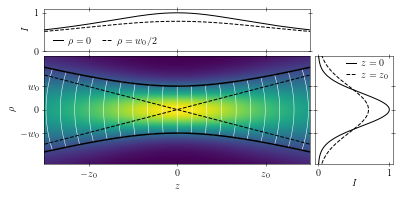

In [5]:
zs = np.linspace(-1.5*z0, 1.5*z0, 3000)
rs = np.linspace(-2.3*w0, 2.3*w0, 3000)
ratio = rs[-1] / zs[-1]
Zs, Rs = np.meshgrid(zs, rs)
ws = w(zs)
fig = plt.figure(figsize=(5.5, 5.5*ratio))
gs = fig.add_gridspec(2,2, width_ratios=(1, 0.6*ratio), height_ratios=(0.8*ratio, 1), 
                      bottom=0.15,top=0.95, right=0.98, left=0.1, wspace=0.03, hspace=0.06)
ax_2d = fig.add_subplot(gs[1,0])
ax_rad = fig.add_subplot(gs[1,1], sharey=ax_2d)
ax_z = fig.add_subplot(gs[0,0], sharex=ax_2d)
axs = [ax_2d, ax_rad, ax_z]

axs[0].imshow(np.abs(E(Rs, Zs)), extent=(zs[0], zs[-1], rs[0], rs[-1]), origin="lower", aspect="auto")
angs = np.angle(E(Rs, Zs))
mask = np.logical_or(Rs>ws, Rs<-ws)
angs[mask]=0
axs[0].contour(Zs, Rs, angs, levels=0, colors="w", linewidths=0.5)
axs[0].plot(zs[ws<rs[-1]], ws[ws<rs[-1]], c="k")
axs[0].plot(-zs[ws<rs[-1]], -ws[ws<rs[-1]], c="k")
axs[0].plot(zs, np.sin(th0)*zs, ls="--", c="k", lw=1)
axs[0].plot(zs, -np.sin(th0)*zs, ls="--", c="k", lw=1)
#axs[0].set_ylabel(r"$\rho$")
#axs[0].set_xlabel("$z$")

axs[1].plot(np.abs(E(rs, 1e-6)), rs, c="k", lw=1, label=r"$z=0$")
axs[1].plot(np.abs(E(rs, z0)), rs, c="k",ls="--", lw=1, label=r"$z=z_0$")
axs[1].legend(frameon=False, handlelength=1, handletextpad=0.5, labelspacing=0.2, loc="upper right", bbox_to_anchor=(1.05,1.05))

axs[2].plot(zs, np.abs(E(0, zs)), c="k",lw=1, label=r"$\rho=0$")
axs[2].plot(zs, np.abs(E(w0/2, zs)), c="k", lw=1 ,ls="--", label=r"$\rho=w_0/2$")
axs[2].legend(frameon=False, handlelength=1, handletextpad=0.5, columnspacing=1, loc="lower left", ncol=2, bbox_to_anchor=(0,-0.1))

#axs[1].set_ylabel("$I$")
#axs[1].set_xlabel(r"$\rho$")


axs[1].set_yticklabels([])
#axs[1].set_xlim(0,1.1)
axs[1].tick_params(axis="y", labelleft=False)
axs[1].set_xlabel(r"$I$", labelpad=1)


axs[2].set_xticklabels([])
axs[2].set_yticks([0., 1])
axs[2].tick_params(axis="x", labelbottom=False)
axs[2].set_ylabel(r"$I$")



axs[0].set_xticks([-z0, 0, z0])
axs[0].set_xticks([-z0, 0, z0])
axs[0].set_xticklabels(["$-z_0$", 0, "$z_0$"])
axs[0].set_yticks([-w0, 0, w0, ])
axs[0].set_yticklabels(["$-w_0$", 0, "$w_0$"])
axs[0].set_ylabel(r"$\rho$")
axs[0].set_xlabel("$z$")


ax_z.set_ylim(top=1.1)

#plt.tight_layout()
plt.savefig("figures/dissertation/gausian_beam.pdf", dpi=600)

In [6]:
#https://medium.com/swlh/ray-tracing-from-scratch-in-python-41670e6a96f9
import numpy as np
import matplotlib.pyplot as plt

def quadratic(x, k):
    return 1/2 * k * x*x

def normalize(vector):
    return vector / np.linalg.norm(vector)

class Ray:
    def __init__(self, origin, direction, power, polarization):
        self.origin = origin
        self.direction = direction
        self.power = power
        self.polarization = polarization

    def termination(self, length):
        return self.origin + self.direction * length
    
    def plot(self, length=None, ax=None, arrowstyle="-", **kwargs):
        if length is None:
            termination = self.intersection
        else:
            termination = self.termination(length)
        if ax is None:
            fig, ax = plt.subplots(1,1)
        ax.annotate("", xytext=self.origin, xy=termination, annotation_clip=False,
                    arrowprops=dict(arrowstyle=arrowstyle, alpha=np.sqrt(self.power), lw=1)|kwargs)
    
    def sphere_intersect(self, center, radius, origin=None):
        if origin is None:
            origin = self.origin
        b = 2 * np.dot(self.direction, origin - center)
        c = np.linalg.norm(origin - center) ** 2 - radius ** 2
        delta = b ** 2 - 4 * c
        if delta > 0:
            d1 = (-b + np.sqrt(delta)) / 2
            d2 = (-b - np.sqrt(delta)) / 2
            d1, d2 = np.sort([d1, d2])
            return d1, d2
        else:
            return None, None
        
    def first_intersection(self, center, radius):
        distance, _ = self.sphere_intersect(center, radius)
        if distance is None:
            self.intersection = None
        return self.termination(distance)
        
    def next_intersection(self, center, radius):
        origin_normal = normalize(self.origin - center)
        shifted_origin = self.origin + 1e-5 * origin_normal
        _, chord_length = self.sphere_intersect(center, radius, origin=shifted_origin)
        return self.termination(chord_length)
    
    def on_sphere(self, center, radius):
        return (np.linalg.norm(self.origin - center) - radius) < 1e-5
    
    def set_intersection(self, center, radius):
        if self.on_sphere(center, radius):
            self.intersection = self.next_intersection(center, radius)
        else:
            self.intersection = self.first_intersection(center, radius)       
    
    def sphere_normal(self, center):
        return normalize(self.intersection - center)
    
    def cosin_angles(self, center, r):
        normal = self.sphere_normal(center)
        c1 = -np.dot(self.direction, normal)
        if c1 < 0:
            normal = -normal
            c1 = -c1
        c2 = np.sqrt(np.abs(1 - r*r*(1 - c1*c1)))
        return c1, c2, normal
    
    def reflected_direction(self, center, r=1):
        c1, _, normal = self.cosin_angles(center, r)
        return self.direction + 2 * c1 * normal

    def refracted_direction(self, center, r):
        c1, c2, normal, = self.cosin_angles(center, r)
        return r*self.direction + (r*c1 - c2) *  normal
    
    def reflection_coefficient(self, center, r):
        normal = self.sphere_normal(center)
        c1, c2, normal = self.cosin_angles(normal, r)
        if self.polarization == "s":
            return np.abs((r*c1 - c2)/(r*c1 + c2))**2
        if self.polarization == "p":
            return np.abs((r*c2 - c1)/(r*c2 + c1))**2
    
    def transmission_coefficient(self, center, r):
        return 1 - self.reflection_coefficient(center, r)
    
    def reflected_power(self, center, r):
        return self.power * self.reflection_coefficient(center, r)
    
    def transmitted_power(self, center, r):
        return self.power * self.transmission_coefficient(center, r)
    
    def spawn_transmitted_ray(self, center, r):
        return Ray(origin=self.intersection, 
                direction=self.refracted_direction(center, r), 
                power=self.transmitted_power(center, r),
                polarization=self.polarization
               )

    def spawn_reflected_ray(self, center, r):
        return Ray(origin=self.intersection, 
                direction=self.reflected_direction(center, r), 
                power=self.reflected_power(center, r),
                polarization=self.polarization
               )
    
    def spawn_rays(self, center, r):
        reflected_ray = self.spawn_reflected_ray(center, r)
        transmitted_ray = self.spawn_transmitted_ray(center, r)
        return reflected_ray, transmitted_ray
    

def trace_rays(ray0, center, radius, n1, n2, N_reflections):
    ray0.set_intersection(center, radius)
    if ray0.intersection is None:
        return None
    rayR1, rayT1 = ray0.spawn_rays(center, n1/n2)
    rayT1.set_intersection(center, radius)
    internal_rays = [rayT1]
    external_rays = [rayR1]
    for i in range(N_reflections):
        internal_ray, external_ray = internal_rays[i].spawn_rays(center, n2/n1)
        internal_ray.set_intersection(center, radius)
        internal_rays.append(internal_ray)
        external_rays.append(external_ray)
    
    external_ray = internal_rays[-1].spawn_transmitted_ray(center, n2/n1)
    external_rays.append(external_ray)
    return external_rays, internal_rays


def net_force(center, radius, focal_length, x_lens, beam_power, beam_waist, N_reflections, n1, n2, c, polarization, ax=None):

    P0 = beam_power / len(x_lens)
    #P0 = beam_power / np.sum(np.exp(-2*x_lens**2/beam_waist**2))
    force = 0
    for x0 in x_lens:
        focus = np.array([focal_length, 0])
        #focus = np.array([focal_length, x0])
        origin = np.array([0, x0])
        direction = normalize(focus - origin)
        power = P0
        #power = P0 * np.exp(-2*(x0**2)/beam_waist**2)
        ray0 = Ray(origin, direction, power, polarization=polarization) 
        try:
            external_rays, internal_rays = trace_rays(ray0, center, radius, n1, n2, N_reflections)
        except TypeError:
            if ax:
                ray0.plot(ax=ax, length=2.3, alpha=np.sqrt(ray0.power/P0),arrowstyle="->")
            continue       
        force += n2/c * (ray0.power*ray0.direction - sum(ray.power*ray.direction for ray in external_rays))   
        if ax:
            ray0.plot(ax=ax, alpha=np.sqrt(ray0.power/P0), arrowstyle="-")    
            for ray in internal_rays:
                ray.plot(ax=ax,alpha=np.sqrt(ray.power/P0))
            for rayi, ray in enumerate(external_rays):
                if rayi ==1:
                    length = 4*radius
                else:
                    length = 3*radius
                ray.plot(ax=ax, alpha=np.sqrt(ray.power/P0), length=length, arrowstyle="->")
    if ax:
        zs_circle = np.linspace(center[0]-radius, center[0]+radius, 1000)
        xs_circle1 = center[1] + np.sqrt(radius**2 - (zs_circle-center[0])**2)
        xs_circle2 = center[1] - np.sqrt(radius**2 - (zs_circle-center[0])**2)
        ax.plot(zs_circle, xs_circle1, c="k")
        ax.plot(zs_circle, xs_circle2, c="k")
        ax.annotate("", xytext=center, xy=center+force*5e10,annotation_clip=False, 
                    arrowprops=dict(arrowstyle="->", color="crimson"))
    return force

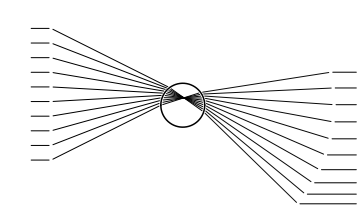

In [62]:
fig, ax = plt.subplots(1,1, figsize=(5.5, 3))

radius = 1
focal_length  = 6*radius
n1 = 1.0
n2 = 1.47
c = 3e8
beam_power = 50e-3
beam_waist = radius
polarization = "s"
N_reflections = 0


R_lens = 3*radius
N_rays = 10
x_lens = np.linspace(-R_lens, R_lens,  N_rays)

center=[focal_length, -0.5]

P0 = beam_power / len(x_lens)
#P0 = beam_power / np.sum(np.exp(-2*x_lens**2/beam_waist**2))
force = 0
for x0 in x_lens:
    focus = np.array([focal_length, 0])
    #focus = np.array([focal_length, x0])
    origin = np.array([0, x0])
    direction = normalize(focus - origin)
    power = P0
    #power = P0 * np.exp(-2*(x0**2)/beam_waist**2)
    ax.annotate("", xytext=[-radius, x0], xy=[0, x0], annotation_clip=False,
                arrowprops=dict(arrowstyle="-", color="k"))
    #rayp.plot(ax=ax, length=2.3, alpha=np.sqrt(ray0.power/P0),arrowstyle="-")
    ray0 = Ray(origin, direction, power, polarization=polarization) 
    try:
        external_rays, internal_rays = trace_rays(ray0, center, radius, n1, n2, N_reflections)
    except TypeError:
        if ax:
            ray0.plot(ax=ax, length=2.3, alpha=np.sqrt(ray0.power/P0),arrowstyle="-")
        continue       
    force += n2/c * (ray0.power*ray0.direction - sum(ray.power*ray.direction for ray in external_rays))   
    if ax:
        ray0.plot(ax=ax, alpha=np.sqrt(ray0.power/P0), arrowstyle="-")    
        for ray in internal_rays:
            ray.plot(ax=ax,alpha=np.sqrt(ray.power/P0))
        for rayi, ray in enumerate(external_rays):
            if rayi ==1:
                length = 6*radius
                ax.annotate("", xytext=ray.termination(length), xy=np.array([14, ray.termination(length)[1]]), annotation_clip=False,
                arrowprops=dict(arrowstyle="-", color="k"))
                ray.plot(ax=ax, alpha=np.sqrt(ray.power/P0), length=length, arrowstyle="-")
    
if ax:
    zs_circle = np.linspace(center[0]-radius, center[0]+radius, 1000)
    xs_circle1 = center[1] + np.sqrt(radius**2 - (zs_circle-center[0])**2)
    xs_circle2 = center[1] - np.sqrt(radius**2 - (zs_circle-center[0])**2)
    ax.plot(zs_circle, xs_circle1, c="k")
    ax.plot(zs_circle, xs_circle2, c="k")
    #ax.annotate("", xytext=center, xy=center+force*5e10,annotation_clip=False, 
    #            arrowprops=dict(arrowstyle="->", color="crimson"))
ax.set_xlim(focal_length-8*radius, focal_length+7*radius)
ax.set_ylim(-4*radius, 4*radius)
ax.set_aspect(1)
ax.set_axis_off()
plt.tight_layout()
plt.savefig("figures/dissertation/talk/spere_down.png", dpi=600)

In [40]:
rayp.propagate(1)

AttributeError: 'Ray' object has no attribute 'propagate'

[ 6.  -0.5] [4.81895086e-11 6.38365986e-11]
[6.  0.5] [ 4.81895086e-11 -6.38365986e-11]
[4 0] [1.00870691e-10 6.46234854e-27]
[8 0] [2.44618116e-11 3.23117427e-27]


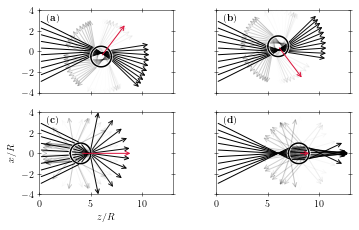

In [10]:

radius = 1
focal_length  = 6*radius
n1 = 1.0
n2 = 1.47
c = 3e8
beam_power = 50e-3
beam_waist = radius
polarization = "s"
N_reflections = 3

R_lens = 3*radius
N_rays = 10
x_lens = np.linspace(-R_lens, R_lens,  N_rays)

center_ys = np.array([-2, 2])*radius
center_xs = np.array([-0.5, 0.5])*radius
centers2 = np.array([[focal_length+center_y, 0] for center_y in center_ys])
centers1 = np.array([[focal_length, center_x] for center_x in center_xs])

fig, axs = plt.subplots(2,2, figsize=(5.5, 3.3), sharex=True, sharey=True)
for i, centers in enumerate([centers1, centers2]):
    for j, center in enumerate(centers):
        ax = axs[i, j]
        force = net_force(
            center, 
            radius, 
            focal_length,
            x_lens, 
            beam_power, 
            beam_waist,
            N_reflections, 
            n1, 
            n2, 
            c, 
            polarization, ax=ax
        )
        print(center, force)
        ax.set_xlim(focal_length-6*radius, focal_length+7*radius)
        ax.set_ylim(-4*radius, 4*radius)
        ax.set_aspect(1)
        lettering(ax, 0.1, 0.9, i*len(center_xs)+j)
        #ax.set_axis_off()
#axs[0,0].set_yticks([-3, 0, 3])
#axs[1,0].set_xticks([0, 5, 10])
#axs[1,0].set_xticklabels([-5, 0, 5])
axs[1,0].set_xlabel("$z/R$")
axs[1,0].set_ylabel("$x/R$")
plt.tight_layout()
#plt.savefig("figures/dissertation/ray_optics.pdf", dpi=600)
#plt.savefig("figures/dissertation/talk/ray_optics.png", dpi=600)

In [10]:
def get_forces_ray_optics(
    centers, radius, focal_length, x_lens, beam_power, beam_waist, N_reflections, 
    n1, n2, c, polarization):
    forces = np.zeros((len(centers), 2))
    for i, center in enumerate(centers):
        force = net_force(
            center, 
            radius, 
            focal_length,
            x_lens, 
            beam_power, 
            beam_waist,
            N_reflections, 
            n1, 
            n2, 
            c, 
            polarization, 
            ax=None)
        forces[i, :] = force
    return forces

def get_potential(xs, forces, xlim, kguess=1e-6, ax=None, inax=None, color="crimson", label=None):
    E = 1e-18
    mask = np.abs(xs) < xlim
    x = xs[mask]
    print(len(x), len(forces[mask]))
    y = -cumtrapz(x, forces[mask], initial=0)
    y -= np.min(y)
    #y = y[y>0]
    #x = x[y>0]
    #plt.plot(x, y, marker="o")
    #plt.show()
    popt, pcov = curve_fit(quadratic, x, y, p0=[kguess])
    k = popt[0]
    if ax:
        ax.plot(xs*1e6, forces*1e12, c=color, label=label, lw=1)
        ax.set_ylim(-1e12*1.1*np.max(forces), np.max(forces)*1.5*1e12)
        #inax.plot(x[::3]*1e6, y[::3]/E, marker="o", mec="k", mfc="None", ms=5)
    if inax:
        xss = np.linspace(max(-xlim, x[0]), min(xlim, x[-1]), 100)
        inax.plot(xss*1e6, quadratic(xss, *popt)/E, c=color, lw=1)
    return k, y

In [14]:

focal_length  = 3e-3
lmbda = 1e-6
R_lens = focal_length*0.33
beam_waist = R_lens
beam_wasit = lmbda / (np.pi*0.33)


n1 = 1
n2 = 1.465
c = 3e8
beam_power = 50e-3

polarization = "s"
N_reflections=3

N_rays = 500
x_lens = np.linspace(-R_lens, R_lens,  N_rays)




46 46
46 46
46 46
46 46
46 46
46 46
46 46
46 46
46 46
46 46
46 46
46 46
46 46
46 46
46 46
46 46
46 46
46 46
46 46
46 46


array([3.17651163e-05, 2.31486243e-05, 1.85596639e-05, 1.56593421e-05,
       1.36347867e-05, 1.21272547e-05, 1.09529061e-05, 1.00072734e-05,
       9.22630198e-06, 8.56835706e-06, 8.00509703e-06, 7.51649352e-06,
       7.08794863e-06, 6.70854302e-06, 6.36992699e-06, 6.06559364e-06,
       5.79038816e-06, 5.54016766e-06, 5.31155998e-06, 5.10178915e-06])

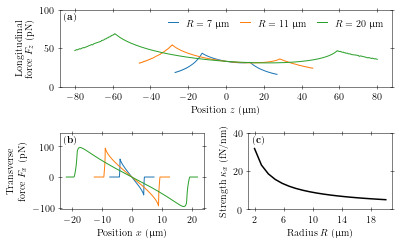

In [18]:
fig = plt.figure(figsize=(5.5, 3.3))
gs = fig.add_gridspec(2, 4, figure=fig)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, :2])
ax3 = fig.add_subplot(gs[1, 2:])
axs = [ax2, ax3]


left, bottom, width, height = [0.6, 0.61, 0.38, 0.33]
#inax = axs[0].inset_axes([left, bottom, width, height])

Rs_ray = np.linspace(2*lmbda, 20*lmbda, 20)
ks_ray = np.zeros_like(Rs_ray)
ci = 0
for Ri, radius in enumerate(Rs_ray):
    center_xs = np.linspace(-1, 1, 500)*1.1*radius
    center_zs = np.linspace(-1, 1, 500)*4*radius
    centers1 = np.array([[focal_length, cx] for cx in center_xs])
    centers2 = np.array([[focal_length+cz, 0] for cz in center_zs])
    forces = get_forces_ray_optics(
        centers1, radius, focal_length, x_lens, beam_power, beam_waist, N_reflections, 
        n1, n2, c, polarization)
    
    forcesL = get_forces_ray_optics(
        centers2, radius, focal_length, x_lens, beam_power, beam_waist, N_reflections, 
        n1, n2, c, polarization)

    if Ri in [len(Rs_ray)//4, len(Rs_ray)//2, len(Rs_ray)-1]:
        label = r"$R=%d~{\rm \upmu}$m"%round(radius*1e6,0)
        color = f"C{ci}"
        ax = axs[0]
        ci+=1
        ax1.plot(center_zs*1e6, forcesL[:,0]*1e12, c=color, label=label, lw=1)
    else:
        ax = None
        color = None
        label=None
    k, potential = get_potential(center_xs, forces[:, 1], 
                                 xlim=0.1*radius, kguess=1e-6, ax=ax, color=color, label=None)
    ks_ray[Ri] = k
    
ax1.legend(frameon=False, loc="upper right", handlelength=1, labelspacing=0.05, ncol=3, columnspacing=1)    
ax1.set_xlabel(r"Position $z$ (${\rm \upmu}$m)")
ax1.set_ylabel("Longitudinal \nforce $F_{z}$ (pN)")
ax1.set_yticks([0, 50, 100])
lettering(ax1, 0.03, 0.9, 0)
    
axs[1].plot(Rs_ray*1e6, ks_ray*1e6, c="k")
#inax.set_xticks([-3,0,3])
#inax.set_yticks([0, 60])

#inax.set_ylabel(r"$U$ (aJ)", labelpad=-1)
#inax.set_ylim([-2, 30])

axs[0].set_xticks([-20, -10, 0, 10, 20])
axs[0].set_ylabel("Transverse \nforce $F_{x}$ (pN)")
axs[0].set_xlabel(r"Position $x$ (${\rm \upmu}$m)")
lettering(axs[0], 0.07, 0.9, 1)

axs[1].set_xticks([2, 6, 10, 14, 18])
axs[1].set_yticks([0, 20, 40])
#axs[1].set_ylim(top=40)
axs[1].set_ylabel("Strength $\kappa_{x}$ (fN/nm)")
axs[1].set_xlabel(r"Radius $R$ (${\rm \upmu}$m)")
lettering(axs[1], 0.07, 0.9, 2)

plt.tight_layout()
plt.subplots_adjust(left=0.14, top=0.98, bottom=0.14, right=0.98)
plt.savefig("figures/dissertation/ray_optics_trapping.pdf")
ks_ray

In [11]:
class RayleighGauss:
    def __init__(self, n, nm, R, lmbda, P, w0, pol):
        self.n = n
        self.nm = nm
        self.R = R
        self. lmbda = lmbda
        self.P = P
        self.w0 = w0
        pol = np.array(pol)
        pol = pol / np.linalg.norm(pol)
        self.pol = pol
        self.k = 2 *np.pi / lmbda
        self.z0 = nm * np.pi*w0**2/lmbda
        self.th0 = lmbda / (nm*np.pi*w0)
        mr = self.n / self.nm
        self.alpha0 = 4 * np.pi * nm**2 * eps0 * R**3 * (mr*mr - 1)/(mr*mr + 2)
        self.alpha = self.alpha0 /(1 - 1j*nm * self.k**3 * self.alpha0 / (6*np.pi * eps0))

    def w(self, z):
        return self.w0 * np.sqrt(1+ z**2/self.z0**2)

    def Rc(self, z):
        return z + self.z0**2 / z

    def eta(self, z):
        return np.arctan2(z, self.z0)

    def phase(self, x, y, z):
        return self.k*z - self.eta(z) + self.k*(x*x+y*y)/(2*self.Rc(z))
    

    def E(self, x, y, z):
        E0 = np.sqrt(4 * self.P / (np.pi * self.w0**2 *self.nm*eps0*c))
        Escale = E0 * self.w0/self.w(z) * np.exp(
            -(x*x + y*y)/self.w(z)**2 + 1j*self.phase(x, y, z)
        )
        E = np.array([p*Escale for p in self.pol])
        return E
    
    def I(self, x, y, z):
        #E = self.E(x,y,z)
        #E2 = np.sum([Ei*np.conj(Ei) for Ei in E], axis=0)
        #return self.nm*eps0*c/2 * E2
        w = self.w(z)
        return 2 * self.P / (np.pi * w**2) * np.exp(-2*(x*x + y*y)/(w*w))

    
    def force2(self, domain):
        X, Y, Z = domain.grid
        deltas = domain.deltas
        E = self.E(X, Y, Z)
        EgradE = np.sum([Ei * np.gradient(np.conj(Ei), *deltas) for Ei in E], axis=0)
        return np.real(self.alpha * EgradE) / 2
    
    def force_grad(self, x,y,z):
        mr = self.n / self.nm
        I = self.I(x,y,z)
        w = self.w(z)
        factor = 2*np.pi*self.nm*self.R**3/c * (mr*mr - 1)/(mr*mr + 2)
        #factor = self.alpha0/(2*c*eps0*self.nm
        #factor = np.real(self.alpha)/(2*c*eps0*self.nm)
        Fx = -4*x*factor * I / w**2
        Fy = -4*y*factor * I / w**2
        Fz = -2*z*factor * I / w**2 * self.w0**2/self.z0**2 * (1 - 2*(x*x+y*y)/w**2)
        return np.array([Fx, Fy, Fz])
        
    def force_sc(self, x,y,z):
        mr = self.n / self.nm
        I = self.I(x,y,z)
        Fz = 128 * np.pi**5 *self.nm**5 * self.R**6 / (3*c*self.lmbda**4) * ((mr*mr - 1)/(mr*mr + 2))**2
        corr = (1 + 4/9 * (self.nm*self.k*self.R)**6 * ((mr*mr - 1)/(mr*mr + 2))**2)
        #Fz /= corr
        Fz *= I
        return np.array([0*x, 0*y, Fz])
    
    def force(self, x,y,z):
        return self.force_grad(x,y,z) + self.force_sc(x,y,z)


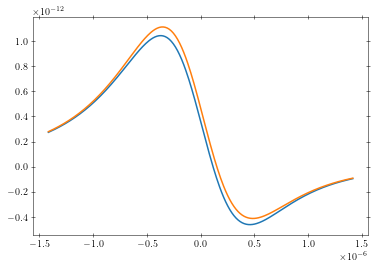

In [12]:
Nr = 300
Nz = 300
Ny = 5
lmbda = 1e-6
radius =1e-7
w0 = lmbda / (np.pi*0.67)
RG = RayleighGauss(n=1.465, nm=1.00, R=radius, lmbda=lmbda, P=50e-3, w0=w0, pol=[1,0,0])
domain = Domain([[-3*w0,  3*w0, Nr],
                 [-1e-12, 1e-12, Ny],
                 [-3*w0, 3*w0, Nz]])
F1 = RG.force2(domain)
F2 = RG.force(*domain.grid)
I = RG.I(*domain.grid)
#plt.plot(xs, I[:, Ny//2, Nz//2])
xs, ys, zs = domain.axes
zs = zs[1:-1]
for F in [F1, F2]:
    #Fx = F[0][:, Ny//2, Nz//2]
    Fz = F[2][Nr//2, Ny//2,1:-1]
    #plt.plot(xs, Fx)
    plt.plot(zs, Fz)



4 4
4 4
4 4
6 6
8 8
10 10
12 12
14 14
16 16
18 18


array([7.04163322e-07, 1.21679422e-06, 1.93222415e-06, 6.07247793e-06,
       1.20693606e-05, 2.09099464e-05, 3.30742311e-05, 4.89856170e-05,
       6.90057020e-05, 9.34280836e-05])

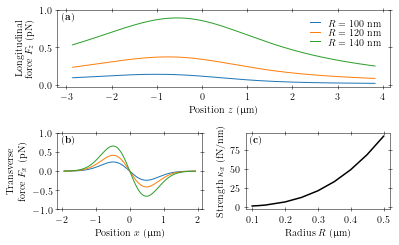

In [13]:
Nr = 200
Nz = 200
Ny = 5
lmbda = 1e-6
w0 = lmbda / (np.pi*0.33)
power = 50e-3
#w0 = 5e-6


fig = plt.figure(figsize=(5.5, 3.3))
gs = fig.add_gridspec(2, 4, figure=fig)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, :2])
ax3 = fig.add_subplot(gs[1, 2:])
axs = [ax2, ax3]


left, bottom, width, height = [0.57, 0.6, 0.38, 0.33]
#inax = axs[0].inset_axes([left, bottom, width, height])

Rs_rayleigh = np.linspace(lmbda/20, lmbda/2, 10)
Rs_rayleigh[:3] = [100e-9,  120e-9, 140e-9]

#Rs=np.linspace(5e-9, 250e-9, 20)
ks_rayleigh = np.zeros_like(Rs_rayleigh)
ci = 0
for Ri, radius in enumerate(Rs_rayleigh):
    RG = RayleighGauss(n=1.465, nm=1.00, R=radius, lmbda=lmbda, P=power, w0=w0, pol=[1,0,0])
    domain = Domain([[-2*w0,  2*w0, Nr],
                 [-1e-12, 1e-12, Ny],
                 [-3*w0, 4*w0, Nz]])
    F = RG.force(*domain.grid)
    xs, ys, zs = domain.axes
    Fx = F[0][:, Ny//2, Nz//2]
    Fz = F[2][Nr//2, Ny//2,1:-1]
    zs = zs[1:-1]

    if Ri in [0,1,2]:
        label = r"$R=%d$ nm"%round(radius*1e9,0)
        color = f"C{ci}"
        ax = axs[0]
        ci+=1
        ax1.plot(zs*1e6, Fz*1e12, c=color, label=label, lw=1)
    else:
        ax = None
        color = None
        label=None
    
    k, potential = get_potential(xs, Fx, 
                                 xlim=radius/3, kguess=1e-6, ax=ax, color=color, label=None)
    ks_rayleigh[Ri] = k
    
ax1.set_yticks([0,0.50, 1])
ax1.legend(frameon=False, loc="upper right", handlelength=1, labelspacing=0.05, ncol=1, columnspacing=1)    
ax1.set_xlabel(r"Position $z$ (${\upmu}$m)")
ax1.set_ylabel("Longitudinal \nforce $F_{z}$ (pN)")
lettering(ax1, 0.03, 0.9, 0)
    
axs[1].plot(Rs_rayleigh*1e6, ks_rayleigh*1e6, c="k")
#inax.set_xticks([-3,0,3])
#inax.set_yticks([0, 60])

#inax.set_ylabel(r"$U$ (aJ)", labelpad=-1)
#inax.set_ylim([-2, 30])

axs[0].set_xticks([-2, -1, 0, 1, 2])
axs[0].set_yticks([-1,-0.5,0, 0.5,1])
axs[0].set_ylabel("Transverse \nforce $F_{x}$ (pN)")
axs[0].set_xlabel(r"Position $x$ (${\rm \upmu}$m)")
lettering(axs[0], 0.07, 0.9, 1)

#axs[1].set_xticks([2, 6, 10, 14, 18])

#axs[1].set_ylim(top=40)
axs[1].set_yticks([0,25,50,75])
axs[1].set_xticks([0.1, 0.2, 0.3, 0.4, 0.5])
axs[1].set_ylabel("Strength $\kappa_{x}$ (fN/nm)")
axs[1].set_xlabel(r"Radius $R$ (${\rm \upmu}$m)")
lettering(axs[1], 0.07, 0.9, 2)

plt.tight_layout()
plt.subplots_adjust(left=0.14, top=0.98, bottom=0.14, right=0.98)
plt.savefig("figures/dissertation/rayleigh_trapping.pdf")
ks_rayleigh

25 25
5e-08 1.1550687705730994e-07
25 25
6.147467068473121e-08 2.1665108020327096e-07
25 25
7.558270271592301e-08 4.0789024416486837e-07
25 25
9.292843517846632e-08 7.7135730771959e-07
25 25
1.1425489899687216e-07 1.4644406505317819e-06
25 25
1.4047564579899888e-07 2.7803927035537186e-06
25 25
1.7271388129436802e-07 5.229383208072606e-06
25 25
2.1235057950506108e-07 9.672982117338415e-06
25 25
2.6108363889570925e-07 1.7715936629037796e-05
25 25
3.2100061444570014e-07 2.7712105908142694e-05
25 25
3.946681412529158e-07 4.574292549883206e-05
25 25
4.852418802655606e-07 5.240984253034389e-05
25 25
5.966016958353022e-07 6.378358409444877e-05
25 25
7.335178556285476e-07 5.965538646803894e-05
25 25
9.018553723227036e-07 5.935863746705724e-05
25 25
1.1088252403758772e-06 6.284988580108619e-05
25 25
1.3632933299805022e-06 6.407012645437215e-05
25 25
1.6761601701448395e-06 5.187292391814634e-05
25 25
2.060827889490341e-06 4.336937731206489e-05
25 25
2.5337743168865727e-06 3.560310476010144e-05
2

<ipython-input-213-50f256051b71>:95: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


array([1.15506877e-07, 2.16651080e-07, 4.07890244e-07, 7.71357308e-07,
       1.46444065e-06, 2.78039270e-06, 5.22938321e-06, 9.67298212e-06,
       1.77159366e-05, 2.77121059e-05, 4.57429255e-05, 5.24098425e-05,
       6.37835841e-05, 5.96553865e-05, 5.93586375e-05, 6.28498858e-05,
       6.40701265e-05, 5.18729239e-05, 4.33693773e-05, 3.56031048e-05,
       2.87818040e-05, 2.33314649e-05, 1.89210723e-05, 1.52131127e-05,
       1.23903846e-05, 1.00197883e-05, 8.18803639e-06, 6.68472300e-06,
       5.38453706e-06, 4.36174275e-06])

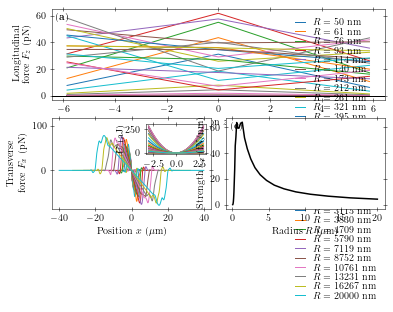

In [213]:
from importlib import reload
import tweezer_force
reload(tweezer_force)
from tweezer_force import Tweezers

lmbda = 1e-6
w0 = lmbda / (np.pi*0.33)
power = 50e-3
z0 = np.pi * w0**2 / lmbda
Rs_mie = np.geomspace(Rs_rayleigh[0], Rs_ray[-1], 30)

#Rs_mie=Rs_ray[::3]


    
fig = plt.figure(figsize=(5.5, 3.3))
gs = fig.add_gridspec(2, 4, figure=fig)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, :2])
ax3 = fig.add_subplot(gs[1, 2:])
axs = [ax2, ax3]
left, bottom, width, height = [0.59, 0.6, 0.38, 0.33]
inax = axs[0].inset_axes([left, bottom, width, height])

ks_mie = np.zeros_like(Rs_mie)
ci = 0
trap = Tweezers(wavelength0=lmbda, n_medium=1.0, c=3e8)
trap.make_beam(name="F", waist=w0, polarization=[0,1], angle=0 )
for Ri, radius in enumerate(Rs_mie):
    dX = np.max([3*w0, 1.1*radius])
    dZmin = -2*z0 
    dZmax = 2*z0
    trap.make_Tmatrix(R=float(radius), n_particle=1.465)
    trap.make_domain(xmin=-dX,
                    xmax=dX,
                    Nx=501,
                    ymin=-1e-12,
                    ymax=1e12,
                    Ny=3,
                    zmin=dZmin,
                    zmax=dZmax,
                    Nz=3)
    trap.evaluate_force(name="F", offset=[0,0,0])
    trap.evaluate_net_force(powers={"F":power})
    trap.make_interpolation("net")
    
    #zs = np.linspace(dZmin, dZmax, 100)
    #xs = np.linspace(-dX, dX, 100)
    xs,ys,zs = trap.domain.axes
    z_points = np.array([[0,0,z] for z in zs])
    x_points = np.array([[x,0,0] for x in xs])
    Fz = trap.interpolate_force(points=z_points)[:, 2]
    Fx = trap.interpolate_force(points=x_points)[:, 0]
    
    if True:
        label = r"$R=%d$ nm"%round(radius*1e9,0)
        color = f"C{ci}"
        ax = axs[0]
        ci+=1
        ax1.plot(zs*1e6, Fz*1e12, c=color, label=label, lw=1)
    else:
        ax = None
        color = None
        label=None
    
    k, potential = get_potential(xs, Fx, 
                                 xlim=dX/20, kguess=1e-6, ax=ax, inax=inax, color=color, label=None)
    ks_mie[Ri] = k
    print(radius, k)
    
ax1.legend(frameon=False, loc="upper right", handlelength=1, labelspacing=0.05, ncol=1, columnspacing=1)    
ax1.set_xlabel(r"Position $z$ (${\rm \mu}$m)")
ax1.set_ylabel("Longitudinal \nforce $F_{z}$ (pN)")
lettering(ax1, 0.03, 0.9, 0)
    
axs[1].plot(Rs_mie*1e6, ks_mie*1e6, c="k")
#inax.set_xticks([-3,0,3])
#inax.set_yticks([0, 60])

inax.set_ylabel(r"$U$ (aJ)", labelpad=-1)
#inax.set_ylim([-2, 30])

#axs[0].set_xticks([-20, -10, 0, 10, 20])
axs[0].set_ylabel("Transverse \nforce $F_{x}$ (pN)")
axs[0].set_xlabel(r"Position $x$ (${\rm \mu}$m)")
#lettering(axs[0], 0.07, 0.9, 1)

#axs[1].set_xticks([2, 6, 10, 14, 18])
#axs[1].set_yticks([0, 10, 20, 30])
#axs[1].set_ylim(top=40)
axs[1].set_ylabel("Strength $\kappa_{x}$ (fN/nm)")
axs[1].set_xlabel(r"Radius $R$ (${\rm \mu}$m)")
lettering(axs[1], 0.07, 0.9, 2)

plt.tight_layout()
plt.subplots_adjust(left=0.14, top=0.98, bottom=0.14, right=0.98)
ax1.axhline(0, c="k", lw=1)
plt.savefig("figures/dissertation/mie_trapping.pdf")
ks_mie

In [19]:
ks_mie = np.array([1.15506877e-07, 2.16651080e-07, 4.07890244e-07, 7.71357308e-07,
       1.46444065e-06, 2.78039270e-06, 5.22938321e-06, 9.67298212e-06,
       1.77159366e-05, 2.77121059e-05, 4.57429255e-05, 5.24098425e-05,
       6.37835841e-05, 5.96553865e-05, 5.93586375e-05, 6.28498858e-05,
       6.40701265e-05, 5.18729239e-05, 4.33693773e-05, 3.56031048e-05,
       2.87818040e-05, 2.33314649e-05, 1.89210723e-05, 1.52131127e-05,
       1.23903846e-05, 1.00197883e-05, 8.18803639e-06, 6.68472300e-06,
       5.38453706e-06, 4.36174275e-06])
Rs_mie = np.array([5.00000000e-08, 6.14746707e-08, 7.55827027e-08, 9.29284352e-08,
       1.14254899e-07, 1.40475646e-07, 1.72713881e-07, 2.12350580e-07,
       2.61083639e-07, 3.21000614e-07, 3.94668141e-07, 4.85241880e-07,
       5.96601696e-07, 7.33517856e-07, 9.01855372e-07, 1.10882524e-06,
       1.36329333e-06, 1.67616017e-06, 2.06082789e-06, 2.53377432e-06,
       3.11525883e-06, 3.83019022e-06, 4.70919365e-06, 5.78992257e-06,
       7.11867167e-06, 8.75235993e-06, 1.07609689e-05, 1.32305404e-05,
       1.62668623e-05, 2.00000000e-05])

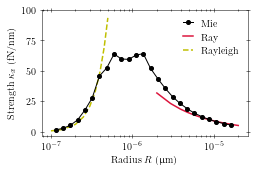

In [22]:
fig, ax = plt.subplots(1,1, figsize=(5.5/1.5, 2.5))
mask = Rs_mie > Rs_rayleigh[0]
ax.plot(Rs_mie[mask][:-1], ks_mie[mask][:-1]*1e6, lw=1, marker="o", c="k", ms=4,
         zorder=10, label="Mie")
ax.plot(Rs_ray[:], ks_ray[:]*1e6, c="crimson", label="Ray")
ax.plot(Rs_rayleigh, ks_rayleigh*1e6, c="y", label="Rayleigh", ls="--")
ax.set_xscale("log")
plt.legend(frameon=False, handlelength=1)
ax.set_ylabel("Strength $\kappa_{x}$ (fN/nm)")
ax.set_xlabel(r"Radius $R$ (${\rm \upmu}$m)")
ax.set_yticks([0,25,50, 75, 100])
plt.tight_layout()
plt.savefig("figures/dissertation/trap_strength_compare.pdf", dpi=600)

In [28]:
from importlib import reload
import tweezer_force
reload(tweezer_force)
from tweezer_force import Tweezers, Domain, upsample
nm=1e-9
um=1e-6
mW = 1e-3

C0 = Tweezers(wavelength0=1064*nm, n_medium=1.0)
C0.make_Tmatrix(R=1.51*um, n_particle=1.45)
C0.make_beam(name="F", waist=2*um, polarization=[1, 0], angle=0.0)
C0.make_beam(name="B", waist=3*um, polarization=[0, 1], angle=180.0)

r00 = np.array([0, 0, 10.60])*1e-6
Ds0 = np.array([0.1, 0.1, 1])*um
Ns0 = np.array([11, 11, 21])
meshspec = np.c_[r00-Ds0, r00+Ds0, Ns0]


C0.make_domain(*meshspec[0],*meshspec[1],*meshspec[2])
C0.evaluate_force(name="F", offset=[0*um, 0*um, 0*um])
C0.evaluate_force(name="B", offset=[0, 0,  25*um])
C0.evaluate_net_force(powers={"B": 70*mW, "F": 56*mW})
C0.make_interpolation(name="net")
#C.save()
#fname = "/home/lhillber/documents/research/brownian/data/d1a7edbc4ee816e81ff4bed9da48d1c6440125d3"
#C = Tweezers()
#C.load(fname)
#C.evaluate_net_force(powers={"B": 70*mW, "F": 56*mW})
#C.make_interpolation(name="net")

In [64]:

[r0, dr0], [k, dk] = C0.fit_min(domain=C0.domain)
r0*1e6, k*1e6

/home/lhillber/documents/research/brownian/notebooks/../src/tweezer_force.py:647: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Fs = np.array(Fs)


(array([-2.34084822e-19,  1.25537420e-15,  1.06009049e+01]),
 array([17.14185783, 15.26415163,  2.68015965]))

In [65]:
k

array([1.71418578e-05, 1.52641516e-05, 2.68015965e-06])

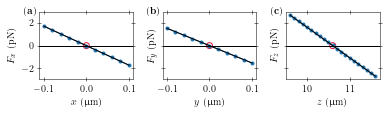

In [31]:

fig, axs = plt.subplots(1, 3, figsize=(5.5, 1.7), sharey=True)
C0.plot_linecut(Funit="pN", unit="um", 
                plot_kwargs={"marker":".", "lw":1}, 
                show_legend=False,
                component="x",
                line=["*", r0[1], r0[2]], ax=axs[0])

C0.plot_linecut(Funit="pN", unit="um",      
                plot_kwargs={"marker":".", "lw":1}, 
                show_legend=False,
                component="y",
                line=[r0[0], "*", r0[2]], ax=axs[1])
C0.plot_linecut(Funit="pN", unit="um", 
                plot_kwargs={"marker":".", "lw":1}, 
                show_legend=False,
                component="z",
                line=[r0[0], r0[1], "*"], ax=axs[2])
for i in range(3):
    axs[i].scatter(r0[i]/um, 0, ec="crimson", fc="none", marker="o")
    axs[i].plot(Domain(meshspec).axes[i]*1e6, -k[i]*(Domain(meshspec).axes[i]-r0[i])*1e12, c='k',lw=1)
    lettering(axs[i], -0.1, 1, i)
    plt.tight_layout()

In [33]:
import cmasher as cmr

{'pivot': 'middle', 'lw': 0.5, 'color': 'k', 'width': 0.004, 'units': 'xy'}
{'pivot': 'middle', 'lw': 0.5, 'color': 'k', 'width': 0.004, 'units': 'xy'}


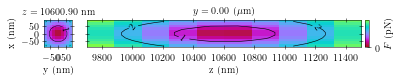

In [57]:
Ds = np.array([0.09, 0.09, 0.9])*um
Ns = np.array([10, 10, 10])
meshspec = np.c_[r0-Ds, r0+Ds, Ns]
domain=Domain(meshspec)
vmax = 3

fig, axs = plt.subplots(1, 2, figsize=(5.5, 2), sharey=True, 
                        gridspec_kw={"width_ratios":[Ds[0],Ds[-1]]})
C0.plot_slices(planes={"z":[r0[2]]}, unit="nm", Funit="pN", 
              axs=axs[0], 
              domain=Domain(meshspec),
              skip=8,
              contours=[1,2,3],
              imshow_kwargs={"cmap":cmr.neon},
              label_contours=True,
              quiver_kwargs={"width": 0.04/10, "units":"xy"},
              contour_kwargs={"linewidths": 0.5},
              clabel_kwargs={"fmt":"%1.0f"})
C0.plot_slices(planes={"y":[r0[0]]}, unit="nm", Funit="pN", 
              axs=axs[1],
              domain=Domain(meshspec),
              skip=6,
              contours=[1, 2, 3],
              imshow_kwargs={"cmap":cmr.neon},
              label_contours=True,
              quiver_kwargs={"width": 0.04/10, "units":"xy"},
              contour_kwargs={"linewidths": 0.6},
              clabel_kwargs={"fmt":"%1.0f"})

for ax in axs:
    for im in ax.get_images():
        im.set_clim(vmin=0, vmax=vmax)

axs[1].set_ylabel("")
fig.suptitle("")




plt.subplots_adjust(bottom=0.2, top=0.9, right=0.9, hspace=0.)
cax = fig.add_axes([axs[1].get_position().x1+0.01,
          axs[1].get_position().y0, 0.01,
          axs[1].get_position().y1-axs[1].get_position().y0])
cbar = fig.colorbar(cm.ScalarMappable(norm=Normalize(0,vmax), cmap=cmr.neon), 
                    cax=cax, ticks=[0,5,10,15,20,25, 30], label=r"$F$ (pN)")
axs[1].set_title(r"$y=0.00~({\rm \mu m})$")

plt.savefig("figures/dissertation/mie_model_slices_zoom.pdf", dpi=600)

In [35]:
from importlib import reload
import tweezer_force
reload(tweezer_force)
from tweezer_force import Tweezers, Domain, upsample
nm=1e-9
um=1e-6
mW = 1e-3

C = Tweezers(wavelength0=1064*nm, n_medium=1.0)
C.make_Tmatrix(R=1.51*um, n_particle=1.45)
C.make_beam(name="F", waist=2*um, polarization=[1, 0], angle=0.0)
C.make_beam(name="B", waist=3*um, polarization=[0, 1], angle=180.0)

r00 = np.array([0, 0, 10.60])*1e-6
Ds0 = np.array([6.0, 6.0, 60.0])*um
Ns0 = np.array([75, 75, 101])
meshspec = np.c_[r00-Ds0, r00+Ds0, Ns0]

C.make_domain(*meshspec[0],*meshspec[1],*meshspec[2])
C.evaluate_force(name="F", offset=[0*um, 0*um, 0*um])
C.evaluate_force(name="B", offset=[0, 0,  25*um])
C.evaluate_net_force(powers={"B": 70*mW, "F": 56*mW})
C.make_interpolation(name="net")
C.save()

#fname = "/home/lhillber/documents/research/brownian/data/d1a7edbc4ee816e81ff4bed9da48d1c6440125d3"
#C = Tweezers()
#C.load(fname)
#C.evaluate_net_force(powers={"B": 70*mW, "F": 56*mW})
#C.make_interpolation(name="net")

Data and parameters saved to:
/home/lhillber/documents/research/brownian/data/0d4662819eebe31403d1b0bc52f2dc721c9448fd


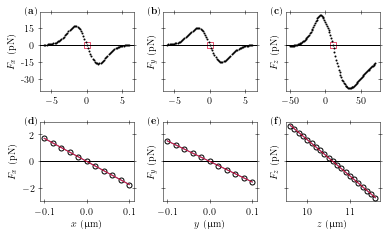

In [66]:
fig, axs = plt.subplots(2, 3, figsize=(5.5, 1.7*2), sharey="row")
C.plot_linecut(Funit="pN", unit="um", 
                plot_kwargs={"marker":".", "lw":0, "c":"k", "ms":2},  
                show_legend=False,
                component="x",
                line=["*", r0[1], r0[2]], ax=axs[0, 0])
C.plot_linecut(Funit="pN", unit="um", 
                plot_kwargs={"marker":".", "lw":0, "c":"k", "ms":2}, 
                show_legend=False,
                component="y",
                line=[r0[0], "*", r0[2]], ax=axs[0, 1])
C.plot_linecut(Funit="pN", unit="um", 
                plot_kwargs={"marker":".", "lw":0, "c":"k", "ms":2}, 
                show_legend=False,
                component="z",
                line=[r0[0], r0[1], "*"], ax=axs[0, 2])

C0.plot_linecut(Funit="pN", unit="um", 
                plot_kwargs={"marker":"o", "mec": "k", "mfc":"none", "lw":1, "ms":5}, 
                show_legend=False,
                component="x",
                line=["*", r0[1], r0[2]], ax=axs[1, 0])
C0.plot_linecut(Funit="pN", unit="um",      
                plot_kwargs={"marker":"o", "mec": "k", "mfc":"none", "lw":1, "ms":5},  
                show_legend=False,
                component="y",
                line=[r0[0], "*", r0[2]], ax=axs[1, 1])
C0.plot_linecut(Funit="pN", unit="um", 
                plot_kwargs={"marker":"o", "mec": "k", "mfc":"none", "lw":1, "ms":5}, 
                show_legend=False,
                component="z",
                line=[r0[0], r0[1], "*"], ax=axs[1, 2])

for i in range(3):
    lettering(axs[0, i], -0.1, 1, i)
    axs[0,i].set_yticks([-30, -15, 0, 15, 30])
    axs[0,i].set_yticklabels([-30, -15, 0, 15, ""])
    axs[0,i].set_xlabel("")


for i in range(3):
    axs[0, i].scatter((r0[i])/um, 0, ec="crimson", fc="none", marker="s", lw=0.7)
    axs[1, i].plot(C0.domain.axes[i]*1e6, -k[i]*(C0.domain.axes[i]-r0[i])*1e12, c='crimson',lw=1)
    lettering(axs[1, i], -0.1, 1, i+3)


plt.tight_layout()
plt.savefig("figures/dissertation/mie_model_lines.pdf", dpi=600)
plt.savefig("figures/dissertation/talk/mie_model_lines.png", dpi=600)

In [63]:
k*1e6

6283185.307179586

{'pivot': 'middle', 'lw': 0.5, 'color': 'k', 'width': 0.04, 'units': 'xy'}
{'pivot': 'middle', 'lw': 0.5, 'color': 'k', 'width': 0.05, 'units': 'xy'}


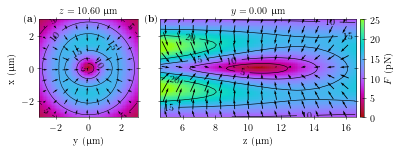

In [60]:
Ds = np.array([3, 3, 6])*um
Ns = np.array([75, 75, 101])
meshspec = np.c_[r0-Ds, r0+Ds, Ns]
domain=Domain(meshspec)
vmax = 25

fig, axs = plt.subplots(1, 2, figsize=(5.5, 2), sharey=True, 
                        gridspec_kw={"width_ratios":[Ds[0],Ds[-1]]})
C.plot_slices(planes={"z":[r0[2]]}, unit="um", Funit="pN", 
              axs=axs[0], 
              domain=Domain(meshspec),
              skip=8,
              contours=[5, 10, 15],
              imshow_kwargs={"cmap":cmr.neon},
              label_contours=True,
              quiver_kwargs={"width": 0.04, "units":"xy"},
              contour_kwargs={"linewidths": 0.5},
              clabel_kwargs={"fmt":"%1.0f"})
C.plot_slices(planes={"y":[r0[0]]}, unit="um", Funit="pN", 
              axs=axs[1],
              domain=Domain(meshspec),
              skip=7,
              contours=[5, 10, 15, 20],
              imshow_kwargs={"cmap":cmr.neon},
              label_contours=True,
              quiver_kwargs={"width": 0.05, "units":"xy"},
              contour_kwargs={"linewidths": 0.6},
              clabel_kwargs={"fmt":"%1.0f"})

for ax in axs:
    for im in ax.get_images():
        im.set_clim(vmin=0, vmax=vmax)

axs[1].set_ylabel("")
fig.suptitle("")
axs[1].set_title(r"$y=0.00~{\rm \upmu m}$")




plt.subplots_adjust(bottom=0.2, top=0.9, right=0.9, hspace=0., wspace=0.15)
cax = fig.add_axes([axs[1].get_position().x1+0.01,
          axs[1].get_position().y0, 0.01,
          axs[1].get_position().y1-axs[1].get_position().y0])
cbar = fig.colorbar(cm.ScalarMappable(norm=Normalize(0,vmax), cmap=cmr.neon), 
                    cax=cax, ticks=[0,5,10,15,20,25], label=r"$F$ (pN)")

lettering(axs[0], -0.1, 1, 0)
lettering(axs[1], -0.045, 1, 1)
plt.savefig("figures/dissertation/mie_model_slices.pdf", dpi=600)
plt.savefig("figures/dissertation/talk/mie_model_slices.png", dpi=600)